In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# **CM1 - Data Pre-processing and Preparation**

In [ ]:
covid_data = pd.read_csv('dkmacovid_train.csv')

In [ ]:
covid_data.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False


In [ ]:
covid_data.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Density Rank 2020 Census,SexRatio
count,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000,1380.000000
mean,16.500000,25.239130,39.470717,-92.879928,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,27.173913,97.760870
std,8.658579,14.513405,6.070494,19.632514,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,15.378197,3.219219
min,2.000000,1.000000,21.094300,-157.498300,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,1.000000,94.000000
25%,9.000000,12.000000,35.630100,-105.311100,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,13.000000,95.000000
50%,16.500000,25.500000,39.583950,-88.259400,1.005915e+05,7453.675956,2.919566e+06,1.499993,85438.613770,28.500000,97.000000
75%,24.000000,37.000000,43.326600,-77.209800,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,41.000000,99.000000
max,31.000000,51.000000,61.370700,-69.381900,3.283336e+06,12811.162350,4.227902e+07,3.928767,235733.711200,52.000000,109.000000


In [ ]:
covid_data['Resident Population 2020 Census']=covid_data['Resident Population 2020 Census'].str.replace(',','')
covid_data["Resident Population 2020 Census"] = covid_data["Resident Population 2020 Census"].astype("float")

In [ ]:
covid_data['Population Density 2020 Census']=covid_data['Population Density 2020 Census'].str.replace(',','')
covid_data["Population Density 2020 Census"] = covid_data["Population Density 2020 Census"].astype("float")

In [ ]:
covid_data.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
count,1380.000000,1380.000000,1380.000000,1380.000000,1.380000e+03,1380.000000,1.380000e+03,1380.000000,1380.000000,1.380000e+03,1380.000000,1380.000000,1380.000000
mean,16.500000,25.239130,39.470717,-92.879928,2.610390e+05,7203.192905,5.271097e+06,1.631757,91763.237514,5.906191e+06,454.834783,27.173913,97.760870
std,8.658579,14.513405,6.070494,19.632514,4.914059e+05,2305.025102,6.991478e+06,0.656702,40858.185997,6.858898e+06,1638.774933,15.378197,3.219219
min,2.000000,1.000000,21.094300,-157.498300,9.550000e+02,1232.233261,3.739460e+05,0.439598,30524.071590,5.768510e+05,1.300000,1.000000,94.000000
25%,9.000000,12.000000,35.630100,-105.311100,2.731600e+04,6042.134459,1.310515e+06,1.246993,67457.197525,1.455271e+06,44.100000,13.000000,95.000000
50%,16.500000,25.500000,39.583950,-88.259400,1.005915e+05,7453.675956,2.919566e+06,1.499993,85438.613770,4.098304e+06,103.500000,28.500000,97.000000
75%,24.000000,37.000000,43.326600,-77.209800,2.592418e+05,8621.924085,6.093790e+06,1.817013,104509.453475,7.029917e+06,253.700000,41.000000,99.000000
max,31.000000,51.000000,61.370700,-69.381900,3.283336e+06,12811.162350,4.227902e+07,3.928767,235733.711200,3.953822e+07,11280.000000,52.000000,109.000000


In [ ]:
m1 = covid_data.isnull().sum()
m1

Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
Confirmed                          0
Deaths                             0
Recovered                          0
dtype: int64

Since there are **no missing values**, we don't need to worry about that. In this dataset there are columns which are not useful enough i.e not meaningful and so can be ignored. so we drop that features.


*   **State id and State name are similar** so one of them can be eliminated. Since State name is a string value, so can be eliminated.
* We cannot remove the **day column** as it will be needed in further interpretation
**bold text**




In [ ]:
covid_data = covid_data.drop(["State"], axis=1)

* Outliers are unusual datapoints which are different from rest of the observation. We need to detect those outliers as it can skew the statistical power of the data analysis process. 
* For detecting the outlier we will use **boxplot**. 
* It works on **inter-quartile range(IQR)**. It decides the lower boundry and upper boundry. Any datapoint visualised outside these range is an outlier.  

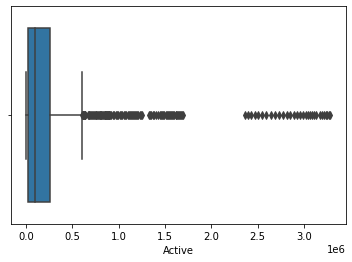

In [ ]:
sns.boxplot(x='Active', data=covid_data)

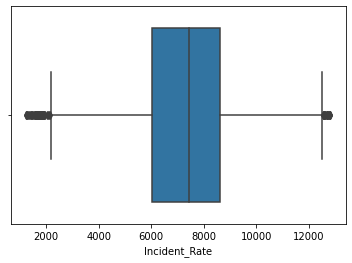

In [ ]:
sns.boxplot(x='Incident_Rate', data=covid_data)

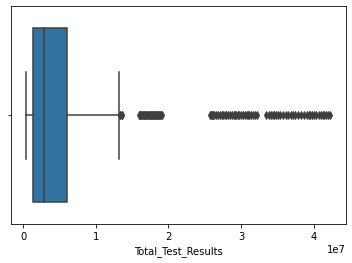

In [ ]:
sns.boxplot(x='Total_Test_Results', data=covid_data)

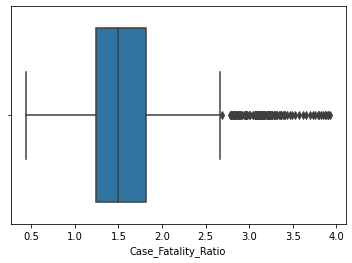

In [ ]:
sns.boxplot(x='Case_Fatality_Ratio', data=covid_data)

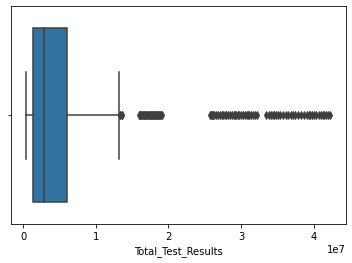

In [ ]:
sns.boxplot(x='Total_Test_Results', data=covid_data)

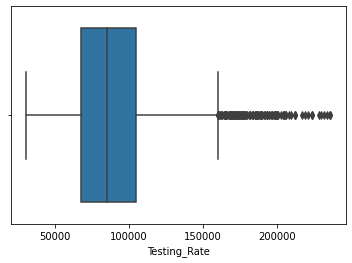

In [ ]:
sns.boxplot(x='Testing_Rate', data=covid_data)

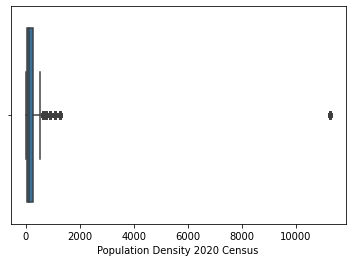

In [ ]:
sns.boxplot(x='Population Density 2020 Census', data=covid_data)

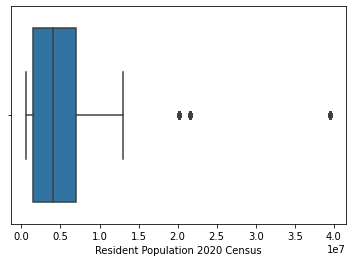

In [ ]:
sns.boxplot(x='Resident Population 2020 Census', data=covid_data)

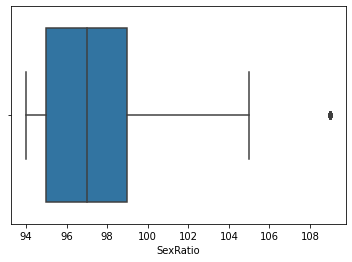

In [ ]:
sns.boxplot(x='SexRatio', data=covid_data)

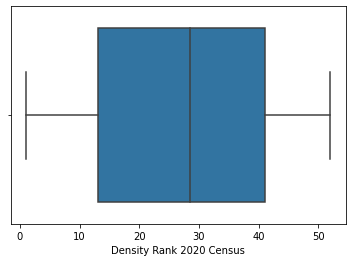

In [ ]:
sns.boxplot(x='Density Rank 2020 Census', data=covid_data)

We can see through the boxplot :
* **lot of outliers** have been detected in **Active, Total test result, testing rate, case fatality ration and incident rate**.
* The data and so we cannot remove it as there be a **huge data loss**. We cannot even replace it with mean or any other way as it would be data alteration. 
* On the other hand we cannot decide that Testing result data is an outlier or not, because the number of tests can be increased in the state if more kits are available or whatsoever reason.
* After looking deeply, there might be cases that **if we remove the outliers than the almost data for single state be removed** which we dont want to do. 
* So we decide to keep it as it is and train our model on the same dataset. 

Now we will normalize the data as there are difference in the range of the values. It is beneficial to do so because many Machine learning models produce absurd results if the scale is not adjusted. Hence, it is an essential pre-processing step before building a model. 
* Here we are going to normalize our data through Z-Score normalization. 
* Z-Score normalization shows that how many standard deviations a datapoint is away from the mean. 


In [ ]:
covid_data.columns

Index(['Day', 'State ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

**Normalization is needed as our data is widely spread out and we need to bring it on the same scale.**

In [ ]:
#Z-Score normalization
covid_data_zscore_norm = ((covid_data.iloc[:, :-3]-covid_data.iloc[:, :-3].mean())/covid_data.iloc[:, :-3].std())

#Adding the remaining label columns
covid_data_zscore_norm['Confirmed'] = covid_data['Confirmed']
covid_data_zscore_norm['Deaths'] = covid_data['Deaths']
covid_data_zscore_norm['Recovered'] = covid_data['Recovered']

In [ ]:
covid_data_zscore_norm.head()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,-1.67464,-1.670120,-1.178243,0.304476,-0.200629,0.143976,-0.483393,-0.476729,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,-1.67464,-1.601218,3.607611,-3.031933,-0.448953,-0.290209,-0.569371,-1.799866,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,-1.67464,-1.532317,-0.945708,-0.944926,0.389053,0.088511,-0.007491,0.074389,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,-1.67464,-1.463415,-0.741458,0.025816,-0.482345,0.202178,-0.456457,-0.031299,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,-1.67464,-1.394513,-0.552594,-1.365168,4.275439,-0.502417,4.022089,-0.792661,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


Now our data is on same scale. Here we remove the last 3 columns as they are the labels and there is no need to normalize it. Now we can start builing our model as our data is ready for analysis.

In [ ]:
covid_data_zscore_norm.describe()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
count,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03,1.380000e+03
mean,-1.576838e-17,-1.497997e-16,-1.046538e-14,1.573629e-14,-9.010506e-18,-2.128973e-15,6.999232e-18,-9.077280e-16,2.029415e-15,7.731336e-17,1.928409e-16,-7.787651e-17,1.736131e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.674640e+00,-1.670120e+00,-3.027170e+00,-3.291396e+00,-5.292652e-01,-2.590410e+00,-7.004457e-01,-1.815372e+00,-1.498822e+00,-7.769965e-01,-2.767523e-01,-1.702014e+00,-1.168255e+00
25%,-8.661929e-01,-9.122001e-01,-6.326696e-01,-6.331931e-01,-4.756211e-01,-5.037075e-01,-5.664870e-01,-5.859034e-01,-5.948879e-01,-6.489264e-01,-2.506353e-01,-9.216889e-01,-8.576210e-01
50%,0.000000e+00,1.797439e-02,1.865295e-02,2.353508e-01,-3.265071e-01,1.086683e-01,-3.363424e-01,-2.006451e-01,-1.547945e-01,-2.635826e-01,-2.143887e-01,8.623163e-02,-2.363522e-01
75%,8.661929e-01,8.103453e-01,6.351843e-01,7.981723e-01,-3.657458e-03,6.154949e-01,1.176709e-01,2.820997e-01,3.119624e-01,1.638348e-01,-1.227348e-01,8.990707e-01,3.849165e-01
max,1.674640e+00,1.774971e+00,3.607611e+00,1.196893e+00,6.150306e+00,2.432932e+00,5.293290e+00,3.497796e+00,3.523663e+00,4.903416e+00,6.605645e+00,1.614369e+00,3.491260e+00


# **CM2 - Representation Learning**

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
principal_components = pca.fit(covid_data_zscore_norm[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]])

Here we **choose a subset** in a way that they are internally related. They cannot be changed whether the cases or conditions increase or decrease.

Text(0.5, 1.0, 'Scree Plot')

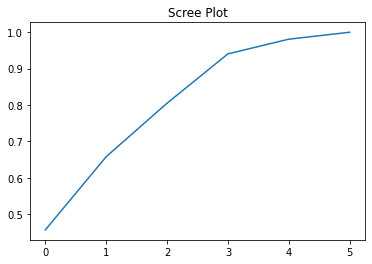

In [ ]:
import matplotlib.pyplot as plt
plt.plot(principal_components.explained_variance_ratio_.cumsum())
plt.title('Scree Plot')

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_) 
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.45714937 0.20091266 0.14703083 0.13550344 0.04032692 0.01907679]
Cumulative Prop. Variance Explained:  [0.45714937 0.65806203 0.80509285 0.94059629 0.98092321 1.        ]


After using the **Scree-plot** and **cumulative variance**, we found out that with the fourth principal component, the cumulative proportion of the variance explained 94% of data, therefore we would consider to keep **four principal components**.

In [ ]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(covid_data_zscore_norm[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]])

we will save this data in another dataframe so the original data is not harmed.

In [ ]:
principal_components[0]

array([-0.99148328, -0.48735292, -0.38716464, -1.14202456])

In [ ]:
covid_data_pca = covid_data_zscore_norm.copy()
covid_data_pca.drop(columns=["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"], inplace=True)
covid_data_pca["PC1"] = principal_components[:, 0]
covid_data_pca["PC2"] = principal_components[:, 1]
covid_data_pca["PC3"] = principal_components[:, 2]
covid_data_pca["PC4"] = principal_components[:, 3]
#We have to change the order of the column as we want our target column to appear at the end.
covid_data_pca = covid_data_pca[['Day', 'State ID', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'PC1', 'PC2', 'PC3', 'PC4', 'Confirmed', 'Deaths',
       'Recovered']]
#our final dataset after the PCA is:
covid_data_pca.head()

,Day,State ID,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,PC1,PC2,PC3,PC4,Confirmed,Deaths,Recovered
0,-1.67464,-1.670120,-0.200629,0.143976,-0.483393,-0.476729,-1.301745,-0.991483,-0.487353,-0.387165,-1.142025,True,False,False
1,-1.67464,-1.601218,-0.448953,-0.290209,-0.569371,-1.799866,2.071154,5.496636,0.858418,0.955562,2.148383,True,True,False
2,-1.67464,-1.532317,0.389053,0.088511,-0.007491,0.074389,-1.268952,0.630929,-1.043406,0.578421,-0.665235,True,True,True
3,-1.67464,-1.463415,-0.482345,0.202178,-0.456457,-0.031299,-0.559153,-0.065379,-0.237780,-0.339333,-1.019354,True,True,True
4,-1.67464,-1.394513,4.275439,-0.502417,4.022089,-0.792661,-0.177543,-1.092868,-3.663035,1.935326,2.904482,True,True,False


**Plotting first 2 features of PCA**

Text(0.5, 1.0, 'Scatter plot for PC1 vs PC2')

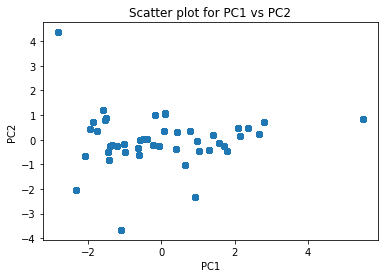

In [ ]:
plt.scatter(x=covid_data_pca['PC1'], y=covid_data_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scatter plot for PC1 vs PC2")


## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


To perform LDA, we need to make 3 different models because our main dataset has 3 targets. 

In [ ]:
covid_data_confirmed = covid_data_zscore_norm.drop(columns=["Deaths", "Recovered"])
covid_data_deaths = covid_data_zscore_norm.drop(columns=["Confirmed", "Recovered"])
covid_data_recovered = covid_data_zscore_norm.drop(columns=["Confirmed", "Deaths"])

In [ ]:
#LDA for model 1 where confirmed is the target columm
lda_confirmed = LDA()
covid_data_confirmed_lda = lda_confirmed.fit_transform(covid_data_confirmed[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]].iloc[:, :-1], covid_data_confirmed.iloc[:, -1])

#Drop the column and add the LDA column
covid_data_confirmed_lda1 = covid_data_confirmed.drop(columns = ["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"])
covid_data_confirmed_lda1["LDA_confirmed"] = covid_data_confirmed_lda

In [ ]:
#LDA for model 2 where Deaths is the target columm
lda_deaths = LDA()
covid_data_deaths_lda = lda_deaths.fit_transform(covid_data_deaths[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]].iloc[:, :-1], covid_data_deaths.iloc[:, -1])

#Drop the column and add the LDA column
covid_data_deaths_lda1 = covid_data_deaths.drop(columns = ["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"])
covid_data_deaths_lda1["LDA_deaths"] = covid_data_deaths_lda

In [ ]:
#LDA for model 3 where recovered is the target columm
lda_recovered = LDA()
covid_data_recovered_lda = lda_recovered.fit_transform(covid_data_recovered[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]].iloc[:, :-1], covid_data_recovered.iloc[:, -1])

#Drop the column and add the LDA column
covid_data_recovered_lda1 = covid_data_recovered.drop(columns = ["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"])
covid_data_recovered_lda1["LDA_confirmed"] = covid_data_recovered_lda

In [ ]:
print("Explained variance ratio for each LDA - ")
print("Confirmed:" + str(lda_confirmed.explained_variance_ratio_))
print("Deaths:" + str(lda_deaths.explained_variance_ratio_))
print("Recovered:"+str(lda_recovered.explained_variance_ratio_))

Explained variance ratio for each LDA - 
Confirmed:[1.]
Deaths:[1.]
Recovered:[1.]


**LDA preforms same for all the three models** i.e all the three targets. Here all of them have same output i.e either true or false. 

We have also noticed that **PCA dose not take output column** while **LDA takes target columns** into consideration while selecting the linear discriminant.

# **CM3 - Decision Trees Classifier**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import export_text

In [ ]:
covid_data_zscore_norm.head()

,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,-1.67464,-1.670120,-1.178243,0.304476,-0.200629,0.143976,-0.483393,-0.476729,-1.301745,-0.128579,-0.217013,0.118745,-1.168255,True,False,False
1,-1.67464,-1.601218,3.607611,-3.031933,-0.448953,-0.290209,-0.569371,-1.799866,2.071154,-0.754174,-0.276752,1.614369,3.491260,True,True,False
2,-1.67464,-1.532317,-0.945708,-0.944926,0.389053,0.088511,-0.007491,0.074389,-1.268952,0.181561,-0.239163,0.508908,0.384916,True,True,True
3,-1.67464,-1.463415,-0.741458,0.025816,-0.482345,0.202178,-0.456457,-0.031299,-0.559153,-0.422031,-0.242214,0.573935,-0.546987,True,True,True
4,-1.67464,-1.394513,-0.552594,-1.365168,4.275439,-0.502417,4.022089,-0.792661,-0.177543,4.903416,-0.122735,-0.921689,0.384916,True,True,False


In [ ]:
X = covid_data_zscore_norm[['Day', 'State ID', 'Lat', 'Long_', 'Active', 'Incident_Rate',
       'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate',
       'Resident Population 2020 Census', 'Population Density 2020 Census',
       'Density Rank 2020 Census', 'SexRatio']]
y = covid_data[['Confirmed', 'Deaths', 'Recovered']]

In [ ]:

max_depth = [3, 5, 10, None]
#empty list to store the cross Val scores.
cv_scores = []

for m in max_depth:
  if m is not None:
    dec_tree = DecisionTreeClassifier(random_state=0, max_depth=m)
  else:
    dec_tree = DecisionTreeClassifier(random_state=0, max_depth=m, min_samples_leaf=2)
  scores = cross_val_score(dec_tree, X, y ,cv=10)
  cv_scores.append(scores.mean())
  
print("Mean Accuracy for [3, 5, 10, None] is "+str(cv_scores))


Mean Accuracy for [3, 5, 10, None] is [0.7420289855072464, 0.8166666666666667, 0.8130434782608695, 0.7702898550724637]


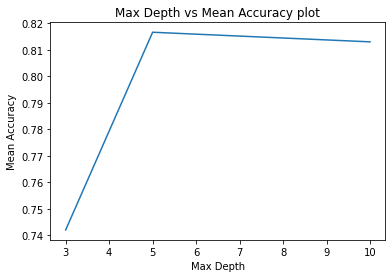

In [ ]:
#Graphical view 
plt.plot(max_depth, cv_scores)
plt.xlabel("Max Depth")
plt.ylabel("Mean Accuracy")
plt.title("Max Depth vs Mean Accuracy plot")
plt.show()

**By considering the above output we can say that model best fits when Max Depth is 5**



In [ ]:
dec_tree = DecisionTreeClassifier(max_depth=5)
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Decision tree visualization 

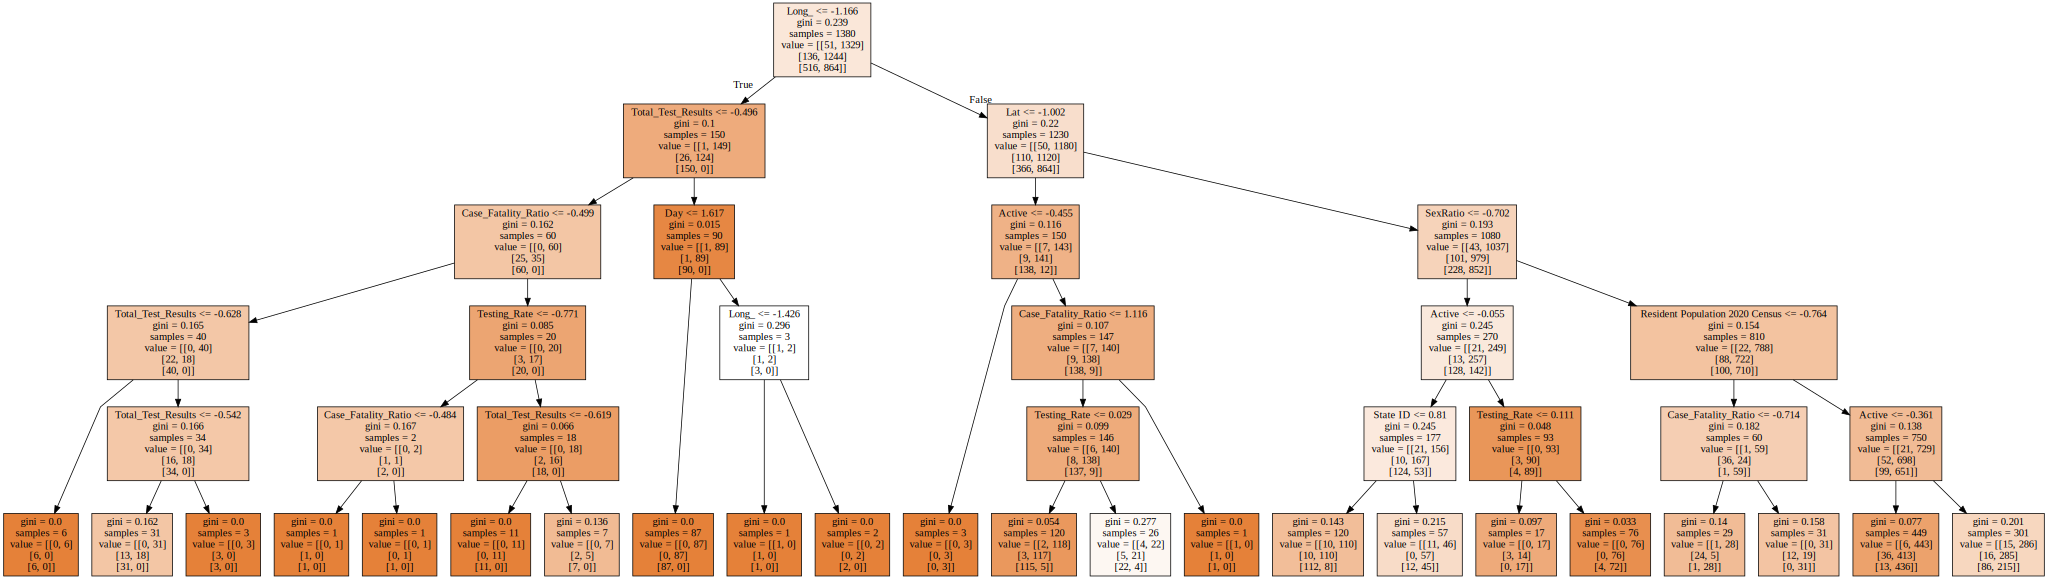

In [ ]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(dec_tree, filled=True, feature_names=list(covid_data_zscore_norm.columns)[:-3], leaves_parallel=True)
graph = graphviz.Source(data, format="png")
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)
graph

In [ ]:
text_representation = export_text(dec_tree)
print(text_representation)

|--- feature_3 <= -1.17
|   |--- feature_6 <= -0.50
|   |   |--- feature_7 <= -0.50
|   |   |   |--- feature_6 <= -0.63
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  -0.63
|   |   |   |   |--- feature_6 <= -0.54
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_6 >  -0.54
|   |   |   |   |   |--- class: 1
|   |   |--- feature_7 >  -0.50
|   |   |   |--- feature_8 <= -0.77
|   |   |   |   |--- feature_7 <= -0.48
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  -0.48
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_8 >  -0.77
|   |   |   |   |--- feature_6 <= -0.62
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_6 >  -0.62
|   |   |   |   |   |--- class: 2
|   |--- feature_6 >  -0.50
|   |   |--- feature_0 <= 1.62
|   |   |   |--- class: 2
|   |   |--- feature_0 >  1.62
|   |   |   |--- feature_3 <= -1.43
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -1.43
|   |   |   |   |--- class: 2
|--- feature_3 >  

Conclusions:
* We can see that right side of the tree is really heavy compard to the left side. 
* The main feature that separates the data is Lat and Long. It can concluded that people within same area are very likely to get infected which inturn would increase the target column.
* Other featues used to split the data is Testing results, Active, total test resuls.

# **CM4 - Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_depth = [3, 5, 10, None]
Number_of_trees = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_dep = 0
max_trees = 0
for md in max_depth:
  for n in Number_of_trees:
    clf = RandomForestClassifier(max_depth=md, n_estimators=n, random_state=0)
    clf.fit(X, y)
    print(md, n)
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(accuracy.mean())
    Scores.append(accuracy.mean())
    if(accuracy.mean() > max_acc):
      max_acc = accuracy.mean()
      max_dep = md 
      max_trees = n

print('Maximum Accuracy value is:', max_acc)
print('The best value of maximum depth:', max_dep)
print('The best value for number of trees:', max_trees)

3 5
0.7782608695652173
3 10
0.7905797101449276
3 50
0.8123188405797102
3 150
0.8101449275362318
3 200
0.8014492753623189
5 5
0.8057971014492754
5 10
0.8239130434782609
5 50
0.8376811594202899
5 150
0.8376811594202899
5 200
0.8376811594202899
10 5
0.8326086956521739
10 10
0.8275362318840578
10 50
0.8318840579710145
10 150
0.8318840579710145
10 200
0.8304347826086957
None 5
0.8130434782608695
None 10
0.8108695652173912
None 50
0.8239130434782609
None 150
0.8217391304347826
None 200
0.8202898550724639
Maximum Accuracy value is: 0.8376811594202899
The best value of maximum depth: 5
The best value for number of trees: 50


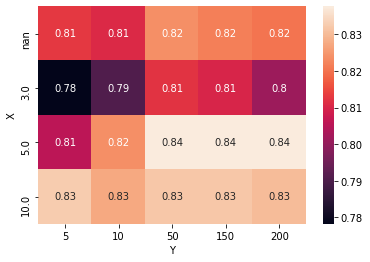

In [ ]:
#Heat map for mean accuracies for different values of number of trees and max depth
max_depth = [3,3,3,3,3, 5,5,5,5,5, 10,10,10,10,10, None,None,None,None,None]
number_of_trees = [5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200, 5,10,50,150,200,]
data = pd.DataFrame({'X': max_depth, 'Y': number_of_trees, 'Z' : Scores})
data_pivoted = data.pivot("X","Y","Z")
ax = sns.heatmap(data_pivoted, annot=True)
plt.show()

**We can observe that the maximum accuracy is achieved for maximum depth = 5 and number of trees = 50.**

Now we will perform the same for features that we obtained through PCA. 

In [ ]:
x = covid_data_pca[['Day', 'State ID', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'PC1', 'PC2', 'PC3', 'PC4']]
Y = covid_data_pca[['Confirmed', 'Deaths', 'Recovered']]

In [ ]:
max_depth_pca = [3, 5, 10, None]
Number_of_trees_pca = [5, 10, 50, 150, 200]
Scores_pca = []
max_acc_pca = 0
max_dep_pca = 0
max_trees_pca = 0
for mdp in max_depth_pca:
  for np in Number_of_trees_pca:
    clf_pca = RandomForestClassifier(max_depth=mdp, n_estimators=np, random_state=0)
    clf_pca.fit(x, Y)
    print(mdp, np)
    accuracy = cross_val_score(clf_pca, x, Y, cv=5, scoring='accuracy')
    print(accuracy.mean())
    Scores_pca.append(accuracy.mean())
    if(accuracy.mean() > max_acc_pca):
      max_acc_pca = accuracy.mean()
      max_dep_pca = mdp 
      max_trees_pca = np

print('Maximum Accuracy value is:', max_acc_pca)
print('The best value of maximum depth:', max_dep_pca)
print('The best value for number of trees:', max_trees_pca)

3 5
0.768840579710145
3 10
0.7927536231884058
3 50
0.7985507246376812
3 150
0.8014492753623188
3 200
0.8
5 5
0.8478260869565217
5 10
0.8427536231884059
5 50
0.8514492753623187
5 150
0.8543478260869565
5 200
0.8586956521739131
10 5
0.8217391304347826
10 10
0.8188405797101449
10 50
0.8340579710144926
10 150
0.8311594202898551
10 200
0.8304347826086957
None 5
0.8137681159420289
None 10
0.8195652173913043
None 50
0.822463768115942
None 150
0.8231884057971015
None 200
0.822463768115942
Maximum Accuracy value is: 0.8586956521739131
The best value of maximum depth: 5
The best value for number of trees: 200


* **We can observe that the maximum accuracy is achieved for maximum depth = 5 and number of trees = 200 on data where PCA is performed.**
* **We also observe that the accuracy of normalized data is 83.7% whereas on PCA data, it is 85.8%.**

# **CM5 - Gradient Tree Bosting**

Since Gradient tree boosting classifier dos'nt support multiple target columns, we will perform it on 3 different dataset where each dataset will have single target column. The features will remain same for all the dataset

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
#X is the features
#Preparing target columns
y_confirmed = y.drop(columns=["Deaths", "Recovered"])
y_deaths = y.drop(columns=["Confirmed", "Recovered"])
y_recovered = y.drop(columns=["Deaths", "Confirmed"])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

0.8623188405797102
0.8608695652173912
0.8420289855072465
0.846376811594203
0.8391304347826087
The maximum accuracy value is:  0.8623188405797102
Best value of number of trees is: 5


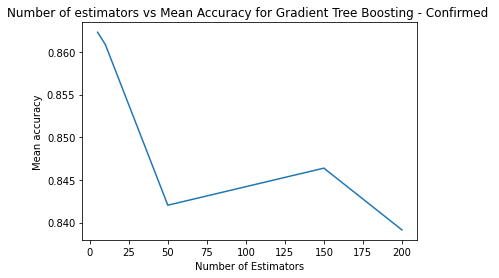

In [ ]:
#Using cross validation to fine tune the number of trees parameter
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf_confirmed = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf_confirmed.fit(X, y_confirmed)
  accuracy = cross_val_score(clf_confirmed, X, y_confirmed, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Confirmed ")
plt.show()

0.832608695652174
0.8413043478260869
0.8362318840579711
0.8297101449275361
0.8231884057971014
The maximum accuracy value is:  0.8413043478260869
Best value of number of trees is: 10


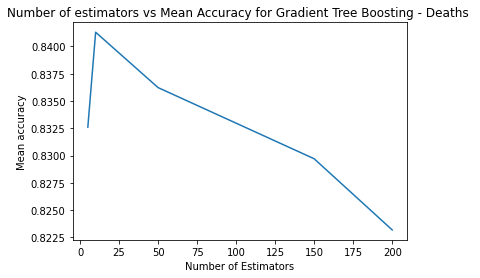

In [ ]:
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf_deaths = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf_deaths.fit(X, y_deaths)
  accuracy = cross_val_score(clf_deaths, X, y_deaths, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Deaths ")
plt.show()

0.8282608695652174
0.8695652173913043
0.9376811594202898
0.9376811594202898
0.9355072463768115
The maximum accuracy value is:  0.9376811594202898
Best value of number of trees is: 50


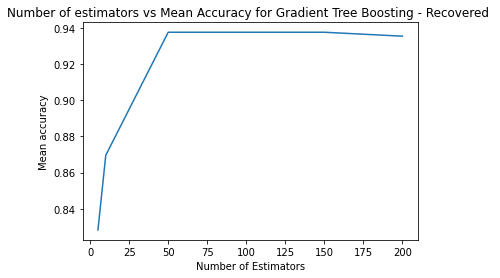

In [ ]:
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf_recovered = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf_recovered.fit(X, y_recovered)
  accuracy = cross_val_score(clf_recovered, X, y_recovered, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Recovered ")
plt.show()

* We have observed that the **accuracy for Recovered** cases dataset is **really high ** compared to other 2 dataset. 
* number of trees vary in each of them.

Now we will perform Gradient boosting on PCA data.

In [ ]:
#Preparing x and Y data 
x = covid_data_pca[['Day', 'State ID', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'PC1', 'PC2', 'PC3', 'PC4']]
Y_confirmed = Y.drop(columns=["Deaths", "Recovered"])
Y_deaths = Y.drop(columns=["Confirmed", "Recovered"])
Y_recovered = Y.drop(columns=["Deaths", "Confirmed"])

0.8623188405797102
0.8615942028985508
0.85
0.8144927536231885
0.8072463768115943
The maximum accuracy value is:  0.8623188405797102
Best value of number of trees is: 5


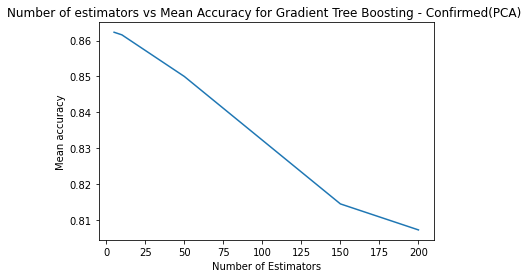

In [ ]:
#Using cross validation to fine tune the number of trees parameter
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf.fit(x, Y_confirmed)
  accuracy = cross_val_score(clf, x, Y_confirmed, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Confirmed(PCA) ")
plt.show()

0.8318840579710145
0.8478260869565218
0.8340579710144927
0.826086956521739
0.8231884057971014
The maximum accuracy value is:  0.8478260869565218
Best value of number of trees is: 10


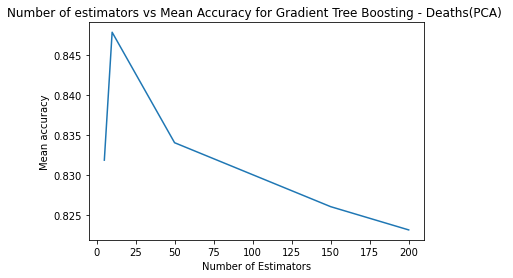

In [ ]:
#Using cross validation to fine tune the number of trees parameter
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf.fit(x, Y_deaths)
  accuracy = cross_val_score(clf, x, Y_deaths, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Deaths(PCA) ")
plt.show()

0.8492753623188406
0.8992753623188406
0.9420289855072463
0.9362318840579709
0.9304347826086957
The maximum accuracy value is:  0.9420289855072463
Best value of number of trees is: 50


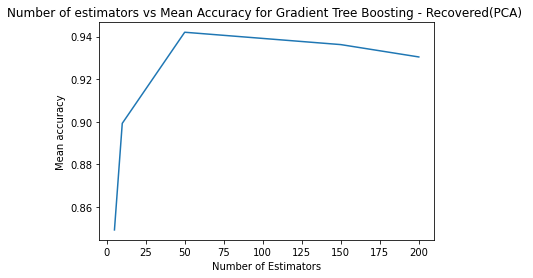

In [ ]:
#Using cross validation to fine tune the number of trees parameter
number_of_estimators = [5, 10, 50, 150, 200]
Scores = []
max_acc = 0
max_trees = 0

for k in number_of_estimators:
  clf = GradientBoostingClassifier(n_estimators=k, random_state=0)
  clf.fit(x, Y_recovered)
  accuracy = cross_val_score(clf, x, Y_recovered, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    max_trees = k

print('The maximum accuracy value is: ', max_acc)
print('Best value of number of trees is:', max_trees)

plt.plot(number_of_estimators, Scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean accuracy")
plt.title("Number of estimators vs Mean Accuracy for Gradient Tree Boosting - Recovered(PCA) ")
plt.show()

* The same is observed in this case too. The accuracy for recovered cases dataset is high.
* The number of trees reamin the same as that we in the previour data without PCA.

# **CM6 - Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

1e-10
0.731159420289855
1e-09
0.731159420289855
1e-05
0.731159420289855
0.001
0.7297101449275362
0.1
0.7876811594202898
Maximum accuracy value is: 0.7876811594202898
Best value for var smoothning is: 0.1


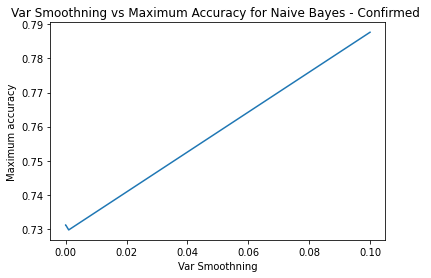

In [ ]:
var_smoothning = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc = 0
best_var = 0
for var in var_smoothning:
  print(var)
  gnb = GaussianNB(var_smoothing=var)
  gnb.fit(X,y_confirmed)
  accuracy = cross_val_score(gnb, X, y_confirmed, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    best_var = var

print('Maximum accuracy value is:', max_acc)
print('Best value for var smoothning is:', best_var)

plt.plot(var_smoothning, Scores)
plt.xlabel("Var Smoothning")
plt.ylabel("Maximum accuracy")
plt.title("Var Smoothning vs Maximum Accuracy for Naive Bayes - Confirmed ")
plt.show()

1e-10
0.6405797101449275
1e-09
0.6405797101449275
1e-05
0.6405797101449275
0.001
0.6413043478260869
0.1
0.731159420289855
Maximum accuracy value is: 0.731159420289855
Best value for var smoothning is: 0.1


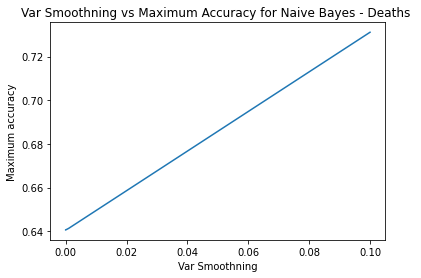

In [ ]:
var_smoothning = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc = 0
best_var = 0
for var in var_smoothning:
  print(var)
  gnb = GaussianNB(var_smoothing=var)
  gnb.fit(X,y_deaths)
  accuracy = cross_val_score(gnb, X, y_deaths, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    best_var = var

print('Maximum accuracy value is:', max_acc)
print('Best value for var smoothning is:', best_var)

plt.plot(var_smoothning, Scores)
plt.xlabel("Var Smoothning")
plt.ylabel("Maximum accuracy")
plt.title("Var Smoothning vs Maximum Accuracy for Naive Bayes - Deaths ")
plt.show()

1e-10
0.7086956521739131
1e-09
0.7086956521739131
1e-05
0.7086956521739131
0.001
0.7086956521739131
0.1
0.6956521739130433
Maximum accuracy value is: 0.7086956521739131
Best value for var smoothning is: 1e-10


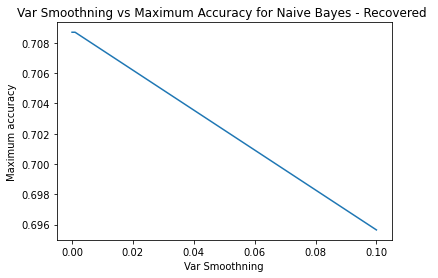

In [ ]:
var_smoothning = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
Scores = []
max_acc = 0
best_var = 0
for var in var_smoothning:
  print(var)
  gnb = GaussianNB(var_smoothing=var)
  gnb.fit(X,y_recovered)
  accuracy = cross_val_score(gnb, X, y_recovered, cv=10, scoring='accuracy')
  print(accuracy.mean())
  Scores.append(accuracy.mean())
  if(accuracy.mean() > max_acc):
    max_acc = accuracy.mean()
    best_var = var

print('Maximum accuracy value is:', max_acc)
print('Best value for var smoothning is:', best_var)

plt.plot(var_smoothning, Scores)
plt.xlabel("Var Smoothning")
plt.ylabel("Maximum accuracy")
plt.title("Var Smoothning vs Maximum Accuracy for Naive Bayes - Recovered ")
plt.show()

We observe that value for var smoothning is same for Confirmed data and deaths data whereas there is totally opposite trend going on in the data for Recovered.

# **CM7 - Interpretation**

Now we will compare the performance of Naive Bayes(NB) to decesion tree approaches.
We will be using model of:
* Naive Bayes
* Decision Tree
* Random Forest
* Gradient tree Boosting

Not all the models accept multitaget values so we will prepare a model differently for individual target values and compare the model. 
There are multiple ways to compare the results. we will be using Accuracy, F1-score

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [ ]:
# Models for Confirmed.
#1.Naive Bayes
nbm_confirmed = GaussianNB(var_smoothing=0.1)
nbm_confirmed.fit(X,y_confirmed)
nbm_pred_confirmed = nbm.predict(X)
print('F1 Score for Naive Bayes - Confirmed: '+str(f1_score(y_confirmed,nbm_pred_confirmed)))
print('Accuracy for Naive Bayes - Confirmed: '+str(accuracy_score(y_confirmed,nbm_pred_confirmed)))
print('Precesion for Naive Bayes - Confirmed: '+str(precision_score(y_confirmed,nbm_pred_confirmed)))
print('Recall for Naive Bayes - Confirmed: '+str(recall_score(y_confirmed, nbm_pred_confirmed)))
print('')

#2.Decision tree
dtm_confirmed = DecisionTreeClassifier(max_depth=5)
dtm_confirmed.fit(X,y_confirmed)
dtm_pred_confirmed = dtm_confirmed.predict(X)
print('F1 Score for Decision tree - Confirmed: '+str(f1_score(y_confirmed,dtm_pred_confirmed)))
print('Accuracy for Decision tree - Confirmed: '+str(accuracy_score(y_confirmed,dtm_pred_confirmed)))
print('Precesion for Decision tree - Confirmed: '+str(precision_score(y_confirmed,dtm_pred_confirmed)))
print('Recall for Decision tree - Confirmed: '+str(recall_score(y_confirmed, dtm_pred_confirmed)))
print('')

#3.Random Forest
rfm_confirmed = RandomForestClassifier(max_depth=5, n_estimators=50)
rfm_confirmed.fit(X,y_confirmed)
rfm_pred_confirmed = rfm_confirmed.predict(X)
print('F1 Score for Random Forest - Confirmed: '+str(f1_score(y_confirmed,rfm_pred_confirmed)))
print('Accuracy for Random Forest - Confirmed: '+str(accuracy_score(y_confirmed,rfm_pred_confirmed)))
print('Precesion for Random Forest - Confirmed: '+str(precision_score(y_confirmed,rfm_pred_confirmed)))
print('Recall for Random Forest - Confirmed: '+str(recall_score(y_confirmed, rfm_pred_confirmed)))
print('')

#4.Gradient Boosting
gbm_confirmed = GradientBoostingClassifier(n_estimators=5)
gbm_confirmed.fit(X,y_confirmed)
dtm_pred_confirmed = dtm_confirmed.predict(X)
print('F1 Score for Decision tree - Confirmed: '+str(f1_score(y_confirmed,dtm_pred_confirmed)))
print('Accuracy for Decision tree - Confirmed: '+str(accuracy_score(y_confirmed,dtm_pred_confirmed)))
print('Precesion for Decision tree - Confirmed: '+str(precision_score(y_confirmed,dtm_pred_confirmed)))
print('Recall for Decision tree - Confirmed: '+str(recall_score(y_confirmed, dtm_pred_confirmed)))
print('')

F1 Score for Naive Bayes - Confirmed: 0.8666386201093816
Accuracy for Naive Bayes - Confirmed: 0.7702898550724637
Precesion for Naive Bayes - Confirmed: 0.982824427480916
Recall for Naive Bayes - Confirmed: 0.7750188111361926

F1 Score for Decision tree - Confirmed: 0.9855394883203559
Accuracy for Decision tree - Confirmed: 0.9717391304347827
Precesion for Decision tree - Confirmed: 0.9714912280701754
Recall for Decision tree - Confirmed: 1.0

F1 Score for Random Forest - Confirmed: 0.9840799703813403
Accuracy for Random Forest - Confirmed: 0.9688405797101449
Precesion for Random Forest - Confirmed: 0.9686588921282799
Recall for Random Forest - Confirmed: 1.0

F1 Score for Decision tree - Confirmed: 0.9855394883203559
Accuracy for Decision tree - Confirmed: 0.9717391304347827
Precesion for Decision tree - Confirmed: 0.9714912280701754
Recall for Decision tree - Confirmed: 1.0



In [ ]:
# Models for Deaths.
#1.Naive Bayes
nbm_deaths = GaussianNB(var_smoothing=0.1)
nbm_deaths.fit(X,y_deaths)
nbm_pred_deaths = nbm.predict(X)
print('F1 Score for Naive Bayes - Deaths: '+str(f1_score(y_deaths,nbm_pred_deaths)))
print('Accuracy for Naive Bayes - Deaths: '+str(accuracy_score(y_deaths,nbm_pred_deaths)))
print('Precesion for Naive Bayes - Deaths: '+str(precision_score(y_deaths,nbm_pred_deaths)))
print('Recall for Naive Bayes - Deaths: '+str(recall_score(y_deaths, nbm_pred_deaths)))
print('')

#2.Decision tree
dtm_deaths = DecisionTreeClassifier(max_depth=5)
dtm_deaths.fit(X,y_deaths)
dtm_pred_deaths = dtm_deaths.predict(X)
print('F1 Score for Decision tree - deaths: '+str(f1_score(y_deaths,dtm_pred_deaths)))
print('Accuracy for Decision tree - deaths: '+str(accuracy_score(y_deaths,dtm_pred_deaths)))
print('Precesion for Decision tree - deaths: '+str(precision_score(y_deaths,dtm_pred_deaths)))
print('Recall for Decision tree - deaths: '+str(recall_score(y_deaths, dtm_pred_deaths)))
print('')

#3.Random Forest
rfm_deaths = RandomForestClassifier(max_depth=5, n_estimators=50)
rfm_deaths.fit(X,y_deaths)
rfm_pred_deaths = rfm_deaths.predict(X)
print('F1 Score for Random Forest - deaths: '+str(f1_score(y_deaths,rfm_pred_deaths)))
print('Accuracy for Random Forest - deaths: '+str(accuracy_score(y_deaths,rfm_pred_deaths)))
print('Precesion for Random Forest - deaths: '+str(precision_score(y_deaths,rfm_pred_deaths)))
print('Recall for Random Forest - deaths: '+str(recall_score(y_deaths, rfm_pred_deaths)))
print('')

#4.Gradient Boosting
gbm_deaths = GradientBoostingClassifier(n_estimators=10)
gbm_deaths.fit(X,y_deaths)
dtm_pred_deaths = dtm_deaths.predict(X)
print('F1 Score for Decision tree - deaths: '+str(f1_score(y_deaths,dtm_pred_deaths)))
print('Accuracy for Decision tree - deaths: '+str(accuracy_score(y_deaths,dtm_pred_deaths)))
print('Precesion for Decision tree - deaths: '+str(precision_score(y_deaths,dtm_pred_deaths)))
print('Recall for Decision tree - deaths: '+str(recall_score(y_deaths, dtm_pred_deaths)))
print('')

F1 Score for Naive Bayes - Deaths: 0.8132635253054101
Accuracy for Naive Bayes - Deaths: 0.6898550724637681
Precesion for Naive Bayes - Deaths: 0.8893129770992366
Recall for Naive Bayes - Deaths: 0.7491961414790996

F1 Score for Decision tree - deaths: 0.964355660007834
Accuracy for Decision tree - deaths: 0.9340579710144927
Precesion for Decision tree - deaths: 0.9404125286478228
Recall for Decision tree - deaths: 0.9895498392282959

F1 Score for Random Forest - deaths: 0.9618973561430793
Accuracy for Random Forest - deaths: 0.9289855072463769
Precesion for Random Forest - deaths: 0.9314759036144579
Recall for Random Forest - deaths: 0.9943729903536977

F1 Score for Decision tree - deaths: 0.964355660007834
Accuracy for Decision tree - deaths: 0.9340579710144927
Precesion for Decision tree - deaths: 0.9404125286478228
Recall for Decision tree - deaths: 0.9895498392282959



In [ ]:
# Models for recovered.
#1.Naive Bayes
nbm_recovered = GaussianNB(var_smoothing=1e-10)
nbm_recovered.fit(X,y_recovered)
nbm_pred_recovered = nbm.predict(X)
print('F1 Score for Naive Bayes - recovered: '+str(f1_score(y_recovered,nbm_pred_recovered)))
print('Accuracy for Naive Bayes - recovered: '+str(accuracy_score(y_recovered,nbm_pred_recovered)))
print('Precesion for Naive Bayes - recovered: '+str(precision_score(y_recovered,nbm_pred_recovered)))
print('Recall for Naive Bayes - recovered: '+str(recall_score(y_recovered, nbm_pred_recovered)))
print('')

#2.Decision tree
dtm_recovered = DecisionTreeClassifier(max_depth=5)
dtm_recovered.fit(X,y_recovered)
dtm_pred_recovered = dtm_recovered.predict(X)
print('F1 Score for Decision tree - recovered: '+str(f1_score(y_recovered,dtm_pred_recovered)))
print('Accuracy for Decision tree - recovered: '+str(accuracy_score(y_recovered,dtm_pred_recovered)))
print('Precesion for Decision tree - recovered: '+str(precision_score(y_recovered,dtm_pred_recovered)))
print('Recall for Decision tree - recovered: '+str(recall_score(y_recovered, dtm_pred_recovered)))
print('')

#3.Random Forest
rfm_recovered = RandomForestClassifier(max_depth=5, n_estimators=50)
rfm_recovered.fit(X,y_recovered)
rfm_pred_recovered = rfm_recovered.predict(X)
print('F1 Score for Random Forest - recovered: '+str(f1_score(y_recovered,rfm_pred_recovered)))
print('Accuracy for Random Forest - recovered: '+str(accuracy_score(y_recovered,rfm_pred_recovered)))
print('Precesion for Random Forest - recovered: '+str(precision_score(y_recovered,rfm_pred_recovered)))
print('Recall for Random Forest - recovered: '+str(recall_score(y_recovered, rfm_pred_recovered)))
print('')

#4.Gradient Boosting
gbm_recovered = GradientBoostingClassifier(n_estimators=50)
gbm_recovered.fit(X,y_recovered)
dtm_pred_recovered = dtm_recovered.predict(X)
print('F1 Score for Decision tree - recovered: '+str(f1_score(y_recovered,dtm_pred_recovered)))
print('Accuracy for Decision tree - recovered: '+str(accuracy_score(y_recovered,dtm_pred_recovered)))
print('Precesion for Decision tree - recovered: '+str(precision_score(y_recovered,dtm_pred_recovered)))
print('Recall for Decision tree - recovered: '+str(recall_score(y_recovered, dtm_pred_recovered)))
print('')

F1 Score for Naive Bayes - recovered: 0.7311715481171549
Accuracy for Naive Bayes - recovered: 0.6275362318840579
Precesion for Naive Bayes - recovered: 0.6669847328244275
Recall for Naive Bayes - recovered: 0.8090277777777778

F1 Score for Decision tree - recovered: 0.9282977558839627
Accuracy for Decision tree - recovered: 0.9050724637681159
Precesion for Decision tree - recovered: 0.8805815160955348
Recall for Decision tree - recovered: 0.9814814814814815

F1 Score for Random Forest - recovered: 0.9490196078431373
Accuracy for Random Forest - recovered: 0.9340579710144927
Precesion for Random Forest - recovered: 0.9196525515743756
Recall for Random Forest - recovered: 0.9803240740740741

F1 Score for Decision tree - recovered: 0.9282977558839627
Accuracy for Decision tree - recovered: 0.9050724637681159
Precesion for Decision tree - recovered: 0.8805815160955348
Recall for Decision tree - recovered: 0.9814814814814815



* Precesion is a measure to determine the rate of False positives. Here the precision for Naive Bayes is Bad compared to other models for every target. We cannot rely much on Naive Bayes. 

* Recall is score for correctly detected positive observations. Naive Bayes model for Recall is also not good compared to other models as it have score of appromximately 70% whereas for all the other model it is more than 98%. Surprisingly for Confirmed it is 100% for all other target.

* F1 score seeks the balance between Precesion and recall. The score for all the models is almost same and good.

* Accuracy is also low for Naive Bayes. For other models it is 90% or more than that.   


# **CM8 - Kaggle Competetion**

In [ ]:
kaggle_data = pd.read_csv('/content/dkmacovid_kaggletest_features.csv')


In [ ]:
kaggle_data.head()

,Id,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,0,2,14,Illinois,40.3495,-88.9861,957138,7697.015291,13436652,1.867428,106035.6834,"12,812,508",230.8,14,97
1,5,3,14,Illinois,40.3495,-88.9861,961499,7732.282519,13482117,1.869933,106394.4716,"12,812,508",230.8,14,97
2,10,4,14,Illinois,40.3495,-88.9861,966468,7772.205747,13530371,1.869466,106775.2693,"12,812,508",230.8,14,97
3,15,5,14,Illinois,40.3495,-88.9861,973157,7826.175891,13617454,1.871700,107462.4870,"12,812,508",230.8,14,97
4,20,6,14,Illinois,40.3495,-88.9861,980553,7885.906848,13698428,1.874835,108101.4954,"12,812,508",230.8,14,97


In [ ]:
kaggle_data.isnull().sum()

Id                                 0
Day                                0
State ID                           0
State                              0
Lat                                0
Long_                              0
Active                             0
Incident_Rate                      0
Total_Test_Results                 0
Case_Fatality_Ratio                0
Testing_Rate                       0
Resident Population 2020 Census    0
Population Density 2020 Census     0
Density Rank 2020 Census           0
SexRatio                           0
dtype: int64

There are no missing values in this too

In [ ]:
kaggle_data.describe()

,Id,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,16.500000,33.000000,39.312840,-97.588580,3.609323e+05,7775.700177,8.362489e+06,1.487583,70500.154408,136.600000,24.800000,98.000000
std,43.445368,8.684438,14.855004,5.580716,12.557531,3.669136e+05,2277.110150,5.821601e+06,0.221819,28462.514113,58.862335,7.782272,1.794847
min,0.000000,2.000000,14.000000,31.054500,-121.490500,3.218300e+04,3240.386963,1.175920e+06,1.153721,37270.805400,57.100000,14.000000,95.000000
25%,37.250000,9.000000,16.000000,35.747800,-97.563500,4.558575e+04,6745.728816,4.016032e+06,1.360612,50385.737530,111.600000,22.000000,97.000000
50%,74.500000,16.500000,43.000000,40.349500,-93.210500,2.840515e+05,8418.269166,6.112604e+06,1.411763,57236.909720,115.900000,24.000000,99.000000
75%,111.750000,24.000000,44.000000,42.011500,-88.986100,4.099355e+05,9617.127621,1.466381e+07,1.553478,91999.757215,167.600000,26.000000,99.000000
max,149.000000,31.000000,48.000000,47.400900,-86.692300,1.105048e+06,10658.111800,1.739912e+07,1.887632,126574.483700,230.800000,38.000000,100.000000


In [ ]:
kaggle_data['Resident Population 2020 Census']=kaggle_data['Resident Population 2020 Census'].str.replace(',','')
kaggle_data["Resident Population 2020 Census"] = kaggle_data["Resident Population 2020 Census"].astype("float")

In [ ]:
kaggle_data.drop(columns=['State'], axis=1, inplace=True)

In [ ]:
kaggle_data

,Id,Day,State ID,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,0,2,14,40.3495,-88.9861,957138,7697.015291,13436652,1.867428,106035.68340,12812508.0,230.8,14,97
1,5,3,14,40.3495,-88.9861,961499,7732.282519,13482117,1.869933,106394.47160,12812508.0,230.8,14,97
2,10,4,14,40.3495,-88.9861,966468,7772.205747,13530371,1.869466,106775.26930,12812508.0,230.8,14,97
3,15,5,14,40.3495,-88.9861,973157,7826.175891,13617454,1.871700,107462.48700,12812508.0,230.8,14,97
4,20,6,14,40.3495,-88.9861,980553,7885.906848,13698428,1.874835,108101.49540,12812508.0,230.8,14,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,129,27,48,47.4009,-121.4905,301078,4009.104264,4446844,1.379349,58396.67084,7705281.0,115.9,24,100
146,134,28,48,47.4009,-121.4905,303566,4042.197310,4470215,1.378452,58703.58257,7705281.0,115.9,24,100
147,139,29,48,47.4009,-121.4905,305516,4068.356574,4495463,1.383146,59035.14337,7705281.0,115.9,24,100
148,144,30,48,47.4009,-121.4905,307312,4091.941935,4524221,1.375174,59412.79805,7705281.0,115.9,24,100


In [ ]:
#Normalizing the data 
kaggle_data_zscore_norm = ((kaggle_data.iloc[:, 1:]-kaggle_data.iloc[:, 1:].mean())/kaggle_data.iloc[:, 1:].std())

In [ ]:
kaggle_data_zscore_norm["Id"] = kaggle_data["Id"]

In [ ]:
kaggle_data_zscore_norm = kaggle_data_zscore_norm[['Day','Id',	'Lat',	'Long_',	'Active',	'Incident_Rate'	,'Total_Test_Results','Case_Fatality_Ratio'	,'Testing_Rate',	'Resident Population 2020 Census',	'Population Density 2020 Census',	'Density Rank 2020 Census',	'SexRatio']]

In [ ]:
kaggle_data_zscore_norm

,Day,Id,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio
0,-1.669653,0,0.185758,0.685045,1.624921,-0.034555,0.871610,1.712406,1.248503,0.093862,1.600344,-1.387770,-0.557150
1,-1.554505,5,0.185758,0.685045,1.636807,-0.019067,0.879419,1.723699,1.261108,0.093862,1.600344,-1.387770,-0.557150
2,-1.439356,10,0.185758,0.685045,1.650350,-0.001535,0.887708,1.721594,1.274487,0.093862,1.600344,-1.387770,-0.557150
3,-1.324208,15,0.185758,0.685045,1.668580,0.022167,0.902667,1.731661,1.298632,0.093862,1.600344,-1.387770,-0.557150
4,-1.209059,20,0.185758,0.685045,1.688737,0.048398,0.916576,1.745796,1.321083,0.093862,1.600344,-1.387770,-0.557150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.209059,129,1.449287,-1.903393,-0.163129,-1.654112,-0.672606,-0.487940,-0.425243,-0.463803,-0.351668,-0.102798,1.114301
146,1.324208,134,1.449287,-1.903393,-0.156348,-1.639579,-0.668592,-0.491981,-0.414460,-0.463803,-0.351668,-0.102798,1.114301
147,1.439356,139,1.449287,-1.903393,-0.151034,-1.628091,-0.664255,-0.470821,-0.402811,-0.463803,-0.351668,-0.102798,1.114301
148,1.554505,144,1.449287,-1.903393,-0.146139,-1.617734,-0.659315,-0.506762,-0.389542,-0.463803,-0.351668,-0.102798,1.114301


In [ ]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(kaggle_data_zscore_norm[["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"]])

In [ ]:
kaggle_data_pca = pd.DataFrame(kaggle_data_zscore_norm)
kaggle_data_pca.drop(columns=["Lat", "Long_", "SexRatio", "Resident Population 2020 Census", "Population Density 2020 Census", "Density Rank 2020 Census"], inplace=True)
kaggle_data_pca["PC1"] = principal_components[:, 0]
kaggle_data_pca["PC2"] = principal_components[:, 1]
kaggle_data_pca["PC3"] = principal_components[:, 2]
kaggle_data_pca["PC4"] = principal_components[:, 3]
#We have to change the order of the column as we want our target column to appear at the end.
kaggle_data_pca = kaggle_data_pca[['Day', 'Id', 'Active', 'Incident_Rate', 'Total_Test_Results',
       'Case_Fatality_Ratio', 'Testing_Rate', 'PC1', 'PC2', 'PC3', 'PC4']]
#our final dataset after the PCA is:
kaggle_data_pca.head()

,Day,Id,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,PC1,PC2,PC3,PC4
0,-1.669653,0,1.624921,-0.034555,0.871610,1.712406,1.248503,-1.885007,-1.070875,-0.555358,-0.549163
1,-1.554505,5,1.636807,-0.019067,0.879419,1.723699,1.261108,-1.885007,-1.070875,-0.555358,-0.549163
2,-1.439356,10,1.650350,-0.001535,0.887708,1.721594,1.274487,-1.885007,-1.070875,-0.555358,-0.549163
3,-1.324208,15,1.668580,0.022167,0.902667,1.731661,1.298632,-1.885007,-1.070875,-0.555358,-0.549163
4,-1.209059,20,1.688737,0.048398,0.916576,1.745796,1.321083,-1.885007,-1.070875,-0.555358,-0.549163


In [ ]:
confirmed = []
deaths = []
recovered = []

In [ ]:
gradient_boosting_model_confirmed = GradientBoostingClassifier(n_estimators=5)
gradient_boosting_model_confirmed.fit(x, Y_confirmed)
pred = gradient_boosting_model_confirmed.predict(kaggle_data_pca)
pred

confirmed = pred.astype(int)

In [ ]:
gradient_boosting_model_deaths = GradientBoostingClassifier(n_estimators=10)
gradient_boosting_model_deaths.fit(x, Y_deaths)
pred = gradient_boosting_model_deaths.predict(kaggle_data_pca)
pred

deaths = pred.astype(int)

In [ ]:
gradient_boosting_model_recovered = GradientBoostingClassifier(n_estimators=50)
gradient_boosting_model_recovered.fit(x, Y_recovered)
pred = gradient_boosting_model_recovered.predict(kaggle_data_pca)
pred

recovered = pred.astype(int)

In [ ]:
final_result = pd.DataFrame(kaggle_data)
final_result.drop(columns=['Day', 'State ID', 'Lat', 'Long_', 'Active', 'Incident_Rate','Total_Test_Results', 
                           'Case_Fatality_Ratio', 'Testing_Rate','Resident Population 2020 Census', 'Population Density 2020 Census','Density Rank 2020 Census', 'SexRatio'], inplace=True, axis=1)
final_result['confirmed'] = confirmed
final_result['deaths'] = deaths
final_result['recovered'] = recovered
final_result.head()

,Id,confirmed,deaths,recovered
0,0,1,1,1
1,5,1,1,1
2,10,1,1,1
3,15,1,1,1
4,20,1,1,1


In [ ]:
final_result.to_csv('Kaggle_result4.csv')